In [47]:
import pandas as pd

data = pd.read_csv('data/wine.csv')

#country — страна-производитель вина.
#description — подробное описание.
#designation — название виноградника, где выращивают виноград для вина.
#points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.
#price — стоимость бутылки вина.
#province — провинция или штат.
#region_1 — винодельческий район в провинции или штате (например Напа).
#region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы 
        #   (например Резерфорд в долине Напа), но это значение может быть пустым.
#taster_name — имя сомелье.
#taster_twitter_handle — твиттер сомелье.
#title — название вина, которое часто содержит год и другую подробную информацию.
#variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).
#winery — винодельня, которая производила вино.


In [48]:
display(data.info())
display(data['taster_name'].unique())
display(data['price'].max())
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


None

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams',
       'Christina Pickard'], dtype=object)

3300.0

(129971, 13)

In [49]:
#избавимся от дубликатов в данных
display(data.duplicated().sum())
data = data.drop_duplicates()
display(data.shape)

9983

(119988, 13)

In [50]:
#посмотрим, где у нам в данных есть пропуски
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


In [51]:
#обработаем пропуски
#сначала посмотрим какой процент пропусков у нас по каким колонкам
null_data = data.isnull()
display(null_data.mean().sort_values(ascending=False))

region_2                 0.610219
designation              0.287904
taster_twitter_handle    0.245408
taster_name              0.207662
region_1                 0.163016
price                    0.069965
country                  0.000492
province                 0.000492
variety                  0.000008
description              0.000000
points                   0.000000
title                    0.000000
winery                   0.000000
dtype: float64

In [52]:
#избавимся от поля region_2 - в нем слишком много пропусков
data = data.drop('region_2',axis=1)

In [53]:
#заполним пропуски
values = {
    'country': 'unknown',
    'designation': 'unknown',
    'price': -1,
    'province': 'unknown',
    'region_1': 'unknown',
    'taster_name': 'unknown',
    'taster_twitter_handle': 'unknown',
    'variety': 'unknown'
}
#заполняем оставшиеся записи константами в соответствии со словарем values
data = data.fillna(values)

country                  0.0
description              0.0
designation              0.0
points                   0.0
price                    0.0
province                 0.0
region_1                 0.0
taster_name              0.0
taster_twitter_handle    0.0
title                    0.0
variety                  0.0
winery                   0.0
dtype: float64

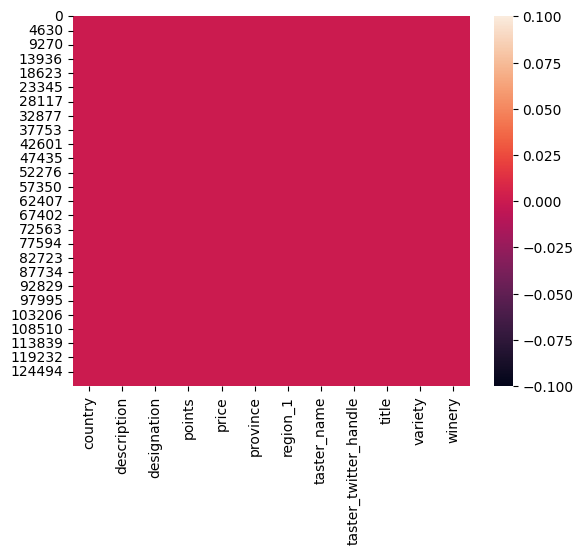

In [54]:
import seaborn as sns
sns.heatmap(data.isnull()) 
null_data = data.isnull()
display(null_data.mean().sort_values(ascending=False))

PANDAS-PROFILING

In [55]:
from pandas_profiling import ProfileReport
df = data
profile = ProfileReport(df, title="Wine Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

SWEETVIZ

In [56]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


D-TALE

In [57]:
import dtale
d = dtale.show(data)
d

c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\dtale\views.py:1929: FutureWarning:

The default value of regex will change from True to False in a future version.



Executing shutdown due to inactivity...


2022-10-09 12:24:22,346 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-10-09 12:24:30,805 - INFO     - Executing shutdown...


Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File "c:\Users\Кирилл Шемонаев\AppData\Lo

2022-10-09 12:24:30,814 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 2525, in wsgi_app
    response = self.full_dispatch_request()
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1822, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1820, in full_dispatch_request
    rv = self.dispatch_request()
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\flask\app.py", line 1796, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "c:\Users\Кирилл Шемонаев\AppData\Local\Programs\Python\Python310\lib\site-packages\dtale\app.py", line 435, in shutdown
    shutdown_server()
  File